## Study Compas Dataset  
[Link](https://github.com/propublica/compas-analysis/blob/master/Compas%20Analysis.ipynb)

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
DATASET_PATH = os.path.join("dataset", "compas", "compas-scores.csv")

In [3]:
data = pd.read_csv(DATASET_PATH)
data.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


In [4]:
data.shape

(11757, 47)

In [5]:
data.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'num_r_cases',
       'r_case_number', 'r_charge_degree', 'r_days_from_arrest',
       'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out',
       'is_violent_recid', 'num_vr_cases', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'type_of_assessment', 'decile_score.1',
       'score_text', 'screening_date'],
      dtype='object')

In [6]:
def check_data(df, columns):
    for col in columns:
        print(col + ":")
        if not col in df.columns:
            print("Nothing found")
        else:
            print(df[col].unique())
        print()

In [7]:
check_data(data, ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count', 
                    'days_b_screening_arrest', 'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']
          )

age:
[69 31 34 24 23 43 44 41 39 20 26 21 27 37 22 47 25 64 42 32 54 49 36 33
 30 63 55 29 38 53 51 28 35 48 46 62 56 45 40 59 50 66 52 71 19 61 58 78
 57 68 18 70 60 65 83 67 75 73 72 77 76 74 96 80 79 86]

c_charge_degree:
['F' 'O' 'M']

race:
['Other' 'Caucasian' 'African-American' 'Hispanic' 'Asian'
 'Native American']

age_cat:
['Greater than 45' '25 - 45' 'Less than 25']

score_text:
['Low' 'Medium' 'High' nan]

sex:
['Male' 'Female']

priors_count:
[ 0  4  1  2 14  3  7  6  5 13  8  9 15 19 21 22 20 10 12 28 11 23 25 24
 36 18 29 16 17 33 30 43 27 26 38 37 35 31 39]

days_b_screening_arrest:
[-1.000e+00        nan  0.000e+00  4.280e+02 -2.000e+01  2.200e+01
 -2.000e+00 -1.320e+02  5.300e+01  8.100e+01 -5.900e+01 -2.400e+01
  3.020e+02 -2.190e+02 -1.300e+01 -3.800e+01  7.000e+01 -3.250e+02
 -1.500e+01 -7.800e+01 -4.300e+01 -3.890e+02 -3.180e+02 -5.000e+00
  1.370e+02 -1.810e+02 -2.390e+02 -2.100e+01 -6.400e+01 -1.000e+01
 -1.370e+02  1.780e+02 -3.000e+01 -3.000e+00  6.700e+01  1.

In [8]:
# select data and preprocess
data_processed = data[data['days_b_screening_arrest'] <= 30]
data_processed = data[data['days_b_screening_arrest'] >= -30] # select within 30 days
data_processed.shape

(9778, 47)

In [9]:
data_processed = data_processed[data_processed['is_recid'] != -1]
data_processed = data_processed[data_processed['c_charge_degree'] != 'O']
data_processed.dropna(subset=["score_text"], inplace=True)
data_processed.shape

(9760, 47)

In [10]:
data_processed = data_processed.reset_index(drop=True)

In [11]:
data_train = data_processed[["age_cat", "c_charge_degree", "race", "sex", "priors_count"]].copy()
data_compare = data_processed[["score_text", "decile_score"]].copy()
data_target = data_processed[["is_recid"]].copy()

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age_cat          9760 non-null   object
 1   c_charge_degree  9760 non-null   object
 2   race             9760 non-null   object
 3   sex              9760 non-null   object
 4   priors_count     9760 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 381.4+ KB


In [13]:
data_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   is_recid  9760 non-null   int64
dtypes: int64(1)
memory usage: 76.4 KB


In [14]:
data_target["is_recid"].value_counts()

0    6360
1    3400
Name: is_recid, dtype: int64

In [15]:
data_train["age_cat"].value_counts()

25 - 45            5578
Greater than 45    2091
Less than 25       2091
Name: age_cat, dtype: int64

In [16]:
data_train["c_charge_degree"].value_counts()

F    6365
M    3395
Name: c_charge_degree, dtype: int64

In [17]:
data_train["race"].value_counts()

African-American    4879
Caucasian           3367
Hispanic             855
Other                581
Asian                 48
Native American       30
Name: race, dtype: int64

In [18]:
data_train["sex"].value_counts()

Male      7763
Female    1997
Name: sex, dtype: int64

In [19]:
data_train["priors_count"].value_counts()

0     3395
1     1819
2     1074
3      718
4      497
5      404
6      305
7      275
8      222
9      175
10     137
11     113
13      96
12      83
14      70
15      55
16      53
17      44
19      35
18      33
20      25
21      23
23      20
22      19
24      15
25      11
27      11
26       9
28       6
29       5
33       4
31       2
30       2
35       1
36       1
37       1
38       1
43       1
Name: priors_count, dtype: int64

In [20]:
data_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   score_text    9760 non-null   object
 1   decile_score  9760 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 152.6+ KB


In [21]:
data_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   is_recid  9760 non-null   int64
dtypes: int64(1)
memory usage: 76.4 KB


In [22]:
# preprocessing
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in ['age_cat', 'c_charge_degree', 'race', 'sex']:
    encoder = LabelEncoder()
    data_train[col] = encoder.fit_transform(data_train[col])
    encoders[col] = encoder
data_train.head(5)

,age_cat,c_charge_degree,race,sex,priors_count
0,1,0,5,1,0
1,0,0,0,1,0
2,2,0,0,1,4
3,0,1,5,1,0
4,0,0,2,1,14


In [23]:
data_train.describe()

,age_cat,c_charge_degree,race,sex,priors_count
count,9760.000000,9760.000000,9760.000000,9760.000000,9760.000000
mean,0.642725,0.347848,1.267623,0.795389,3.128586
std,0.811283,0.476312,1.450518,0.403437,4.670708
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,4.000000
max,2.000000,1.000000,5.000000,1.000000,43.000000


## Build Model  
The goal here is to build several models to predict the possibility of a person's is_recid in future  
and compare it with the decile_score and score_text output  

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [25]:
result = cross_validate(estimator=KNeighborsClassifier(),
                        X=data_train.to_numpy(), y=data_target.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_neighbor = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_neighbor['avg_score'])

0.6399590163934427


In [26]:
result = cross_validate(estimator=LinearSVC(dual=False),
                        X=data_train.to_numpy(), y=data_target.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_linearSVC = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_linearSVC['avg_score'])

0.6763319672131148


In [27]:
result = cross_validate(estimator=SGDClassifier(),
                        X=data_train.to_numpy(), y=data_target.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_SGD = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_SGD['avg_score'])

0.6571721311475409


In [28]:
result = cross_validate(estimator=LogisticRegression(),
                        X=data_train.to_numpy(), y=data_target.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_logreg = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_logreg['avg_score'])

0.6774590163934426


In [29]:
result = cross_validate(estimator=RandomForestClassifier(),
                        X=data_train.to_numpy(), y=data_target.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_forest = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_forest['avg_score'])

0.6663934426229509


## Improvement

In [30]:
# select balanced rows
idx0 = data_target[data_target["is_recid"] == 0].copy().index
idx1 = data_target[data_target["is_recid"] == 1].copy().index
idx0.shape, idx1.shape

((6360,), (3400,))

In [31]:
rnd_idx0 = idx0.to_numpy()[np.random.permutation(idx0.shape[0])][:idx1.shape[0]]
final_index = rnd_idx0.tolist() + idx1.tolist()
len(final_index)

6800

In [32]:
data_target_selected = data_target.iloc[final_index].copy()
data_target_selected.shape

(6800, 1)

In [33]:
data_target_selected[data_target_selected["is_recid"] == 0].shape

(3400, 1)

In [34]:
data_target_selected[data_target_selected["is_recid"] == 1].shape

(3400, 1)

In [35]:
data_train_selected = data_train.iloc[final_index].copy()

In [36]:
result = cross_validate(estimator=KNeighborsClassifier(),
                        X=data_train_selected.to_numpy(), y=data_target_selected.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_neighbor_selected = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_neighbor_selected['avg_score'])

0.6061764705882353


In [37]:
result = cross_validate(estimator=LinearSVC(dual=False),
                        X=data_train_selected.to_numpy(), y=data_target_selected.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_linearSVC_selected = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_linearSVC_selected['avg_score'])

0.6395588235294117


In [38]:
result = cross_validate(estimator=SGDClassifier(),
                        X=data_train_selected.to_numpy(), y=data_target_selected.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_SGD_selected = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_SGD_selected['avg_score'])

0.5830882352941177


In [39]:
result = cross_validate(estimator=LogisticRegression(),
                        X=data_train_selected.to_numpy(), y=data_target_selected.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_logreg_selected = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_logreg_selected['avg_score'])

0.6397058823529411


In [40]:
result = cross_validate(estimator=RandomForestClassifier(),
                        X=data_train_selected.to_numpy(), y=data_target_selected.to_numpy().ravel(), cv=5,
                        return_estimator=True)
result_best_ids = np.argmax(result["test_score"])
model_forest_selected = {
    'avg_score': result['test_score'].mean(),
    'best_estimator': result['estimator'][result_best_ids]
}
print(model_forest_selected['avg_score'])

0.6380882352941176


### Try SMOTE 

In [41]:
from sklearn.model_selection import train_test_split

def test_with_smote(X, y, algo_list, smote_obj, repeat=10, test_size=0.2):
    for algo in algo_list:
        score = 0
        for _ in range(repeat):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
            X_train_res, y_train_res = smote_obj.fit_resample(X_train, y_train)
            algo.fit(X_train_res, y_train_res)
            score += algo.score(X_test, y_test)
        score /= repeat
        print("{}: {:.5f}".format(algo.__class__.__name__, score))

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
X = data_train.to_numpy()
y = data_target.to_numpy().ravel()
algo_list = [KNeighborsClassifier(), LinearSVC(dual=False), SGDClassifier(), LogisticRegression(), RandomForestClassifier()]

In [44]:
from imblearn.over_sampling import BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, ADASYN

In [45]:
test_with_smote(X, y, algo_list, BorderlineSMOTE())

KNeighborsClassifier: 0.60758
LinearSVC: 0.64457
SGDClassifier: 0.64493
LogisticRegression: 0.64237
RandomForestClassifier: 0.61793


In [46]:
test_with_smote(X, y, algo_list, KMeansSMOTE())

KNeighborsClassifier: 0.64887
LinearSVC: 0.67951
SGDClassifier: 0.67976
LogisticRegression: 0.68407
RandomForestClassifier: 0.67095


In [47]:
test_with_smote(X, y, algo_list, SVMSMOTE())

KNeighborsClassifier: 0.64011
LinearSVC: 0.65707
SGDClassifier: 0.65072
LogisticRegression: 0.66158
RandomForestClassifier: 0.64800


In [48]:
test_with_smote(X, y, algo_list, ADASYN())

KNeighborsClassifier: 0.61142
LinearSVC: 0.64549
SGDClassifier: 0.63878
LogisticRegression: 0.64903
RandomForestClassifier: 0.62966


In [49]:
def test_without_smote(X, y, algo_list, repeat=10, test_size=0.2):
    for algo in algo_list:
        score = 0
        for _ in range(repeat):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
            # X_train_res, y_train_res = smote_obj.fit_resample(X_train, y_train)
            algo.fit(X_train, y_train)
            score += algo.score(X_test, y_test)
        score /= repeat
        print("{}: {:.5f}".format(algo.__class__.__name__, score))

In [50]:
test_without_smote(X, y, algo_list)

KNeighborsClassifier: 0.65835
LinearSVC: 0.67864
SGDClassifier: 0.67474
LogisticRegression: 0.68069
RandomForestClassifier: 0.66860


### Add Parameter Searching

In [51]:
from sklearn.model_selection import GridSearchCV

def grid_search(X, y, model, params, smote):
    print("Model: {}".format(model.__class__.__name__))
    X_res, y_res = smote.fit_resample(X, y) # enlarge dataset
    search = GridSearchCV(model, param_grid=params, cv=10)
    search.fit(X_res, y_res)
    print("Best parameter: {}".format(search.best_params_))
    print("Acc on original data: {:.4f}".format(search.best_estimator_.score(X, y)))
    print("Acc on enlarged data: {:.4f}".format(search.best_estimator_.score(X_res, y_res)))

In [52]:
knn_params = {
    "n_neighbors": [10, 50, 100, 500, 1000],
}
grid_search(X, y, KNeighborsClassifier(), knn_params, BorderlineSMOTE())

Model: KNeighborsClassifier
Best parameter: {'n_neighbors': 500}
Acc on original data: 0.6377
Acc on enlarged data: 0.6315


In [53]:
grid_search(X, y, KNeighborsClassifier(), knn_params, KMeansSMOTE())

Model: KNeighborsClassifier
Best parameter: {'n_neighbors': 1000}
Acc on original data: 0.6808
Acc on enlarged data: 0.7551


In [54]:
grid_search(X, y, KNeighborsClassifier(), knn_params, SVMSMOTE())

Model: KNeighborsClassifier
Best parameter: {'n_neighbors': 500}
Acc on original data: 0.6505
Acc on enlarged data: 0.6690


In [55]:
grid_search(X, y, KNeighborsClassifier(), knn_params, ADASYN())

Model: KNeighborsClassifier
Best parameter: {'n_neighbors': 500}
Acc on original data: 0.6449
Acc on enlarged data: 0.6382


In [56]:
svm_params = {
    "C": [0.01, 0.1, 1, 10],
}
grid_search(X, y, LinearSVC(), svm_params, BorderlineSMOTE())

Model: LinearSVC
Best parameter: {'C': 10}
Acc on original data: 0.5704
Acc on enlarged data: 0.6064


In [57]:
grid_search(X, y, LinearSVC(), svm_params, KMeansSMOTE())

Model: LinearSVC
Best parameter: {'C': 0.01}
Acc on original data: 0.6795
Acc on enlarged data: 0.7535


In [58]:
grid_search(X, y, LinearSVC(), svm_params, SVMSMOTE())

Model: LinearSVC
Best parameter: {'C': 0.1}
Acc on original data: 0.6588
Acc on enlarged data: 0.6382


In [59]:
grid_search(X, y, LinearSVC(), svm_params, ADASYN())

Model: LinearSVC
Best parameter: {'C': 1}
Acc on original data: 0.6513
Acc on enlarged data: 0.6227


In [60]:
sgd_params = {
    "alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
}
grid_search(X, y, SGDClassifier(), sgd_params, BorderlineSMOTE())

Model: SGDClassifier
Best parameter: {'alpha': 0.01}
Acc on original data: 0.6183
Acc on enlarged data: 0.6059


In [61]:
grid_search(X, y, SGDClassifier(), sgd_params, KMeansSMOTE())

Model: SGDClassifier
Best parameter: {'alpha': 1}
Acc on original data: 0.6801
Acc on enlarged data: 0.7546


In [62]:
grid_search(X, y, SGDClassifier(), sgd_params, SVMSMOTE())

Model: SGDClassifier
Best parameter: {'alpha': 0.0001}
Acc on original data: 0.6820
Acc on enlarged data: 0.6459


In [63]:
grid_search(X, y, SGDClassifier(), sgd_params, ADASYN())

Model: SGDClassifier
Best parameter: {'alpha': 0.01}
Acc on original data: 0.6581
Acc on enlarged data: 0.6210


In [64]:
lg_params = {
    "C": [1e-2, 1e-1, 1, 1e1, 1e2]
}
grid_search(X, y, LogisticRegression(), lg_params, BorderlineSMOTE())

Model: LogisticRegression
Best parameter: {'C': 0.01}
Acc on original data: 0.6402
Acc on enlarged data: 0.6058


In [65]:
grid_search(X, y, LogisticRegression(), lg_params, KMeansSMOTE())

Model: LogisticRegression
Best parameter: {'C': 0.1}
Acc on original data: 0.6821
Acc on enlarged data: 0.7481


In [66]:
grid_search(X, y, LogisticRegression(), lg_params, SVMSMOTE())

Model: LogisticRegression
Best parameter: {'C': 0.01}
Acc on original data: 0.6639
Acc on enlarged data: 0.6614


In [67]:
grid_search(X, y, LogisticRegression(), lg_params, ADASYN())

Model: LogisticRegression
Best parameter: {'C': 0.01}
Acc on original data: 0.6547
Acc on enlarged data: 0.6253


In [68]:
forest_params = {
    "n_estimators": [10, 50, 100, 200, 500, 1000],
}
grid_search(X, y, RandomForestClassifier(), forest_params, BorderlineSMOTE())

Model: RandomForestClassifier
Best parameter: {'n_estimators': 1000}
Acc on original data: 0.6612
Acc on enlarged data: 0.6625


In [69]:
grid_search(X, y, RandomForestClassifier(), forest_params, KMeansSMOTE())

Model: RandomForestClassifier
Best parameter: {'n_estimators': 1000}
Acc on original data: 0.7128
Acc on enlarged data: 0.7790


In [70]:
grid_search(X, y, RandomForestClassifier(), forest_params, SVMSMOTE())

Model: RandomForestClassifier
Best parameter: {'n_estimators': 100}
Acc on original data: 0.6767
Acc on enlarged data: 0.6823


In [71]:
grid_search(X, y, RandomForestClassifier(), forest_params, ADASYN())

Model: RandomForestClassifier
Best parameter: {'n_estimators': 100}
Acc on original data: 0.6734
Acc on enlarged data: 0.6650


### Per Class Accuracy

In [72]:
clf = RandomForestClassifier(n_estimators=200)
smote = KMeansSMOTE()
X_res, y_res = smote.fit_resample(X, y)
clf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
encoders["race"].classes_

array(['African-American', 'Asian', 'Caucasian', 'Hispanic',
       'Native American', 'Other'], dtype=object)

In [74]:
encoders["race"].transform(['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other'])

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [75]:
data_train_black = X[data_train[data_train["race"] == 0].index.tolist()]
data_train_white = X[data_train[data_train["race"] == 2].index.tolist()]
data_target_black = y[data_train[data_train["race"] == 0].index.tolist()]
data_target_white = y[data_train[data_train["race"] == 2].index.tolist()]

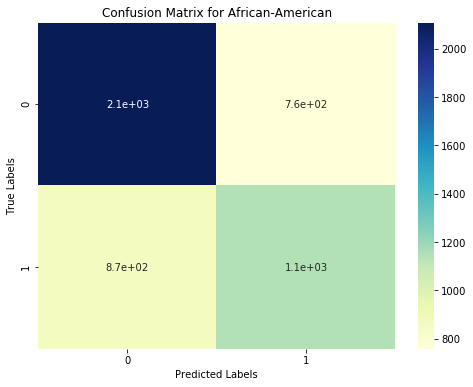

In [80]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix for African-American")
sns.heatmap(pd.DataFrame(confusion_matrix(data_target_black, clf.predict(data_train_black)), index=[0, 1], columns=[0, 1]), annot=True, cmap="YlGnBu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

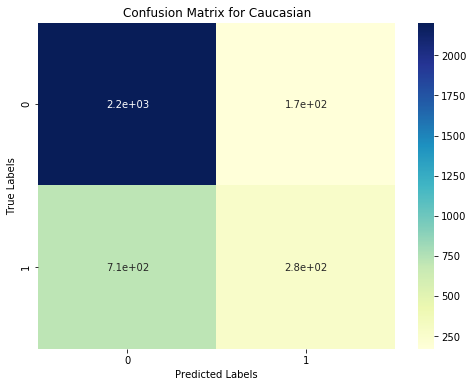

In [81]:
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix for Caucasian")
sns.heatmap(pd.DataFrame(confusion_matrix(data_target_white, clf.predict(data_train_white)), index=[0, 1], columns=[0, 1]), annot=True, cmap="YlGnBu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [78]:
data_train_black.shape, data_train_white.shape

((4879, 5), (3367, 5))